# Getting Started with Anomalib Image Anomaly Detection

This notebook provides a comprehensive introduction to setting up and using Anomalib for image anomaly detection. We'll cover:

1. **Environment Setup** - Installing and verifying dependencies
2. **Data Preparation** - Organizing datasets for Anomalib
3. **Model Training** - Training various anomaly detection models
4. **Evaluation** - Assessing model performance
5. **Inference** - Making predictions on new images
6. **Visualization** - Analyzing results and anomaly maps

## Prerequisites
- Python 3.8+
- CUDA-compatible GPU (recommended)
- Basic understanding of machine learning concepts

## 1. Install Required Packages

First, let's install all the necessary packages for anomaly detection with Anomalib.

In [ ]:
# Install core packages if not already installed
import subprocess
import sys

def install_package(package):
    """Install a package using pip."""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Core packages for anomaly detection
required_packages = [
    "anomalib>=1.0.0",
    "torch>=1.13.0", 
    "torchvision>=0.14.0",
    "pytorch-lightning>=1.9.0",
    "numpy>=1.21.0",
    "matplotlib>=3.5.0",
    "opencv-python>=4.5.0",
    "Pillow>=8.3.0",
    "omegaconf>=2.1.0",
    "scikit-learn>=1.0.0"
]

print("Installing required packages...")
for package in required_packages:
    try:
        install_package(package)
        print(f"✓ {package} installed successfully")
    except Exception as e:
        print(f"✗ Failed to install {package}: {e}")

print("Package installation completed!")

## 2. Import and Verify Libraries

Let's import the necessary libraries and verify that everything is working correctly.

In [ ]:
# Import essential libraries
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src directory to Python path
project_root = Path.cwd().parent
sys.path.append(str(project_root / 'src'))

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image

# Anomalib imports
import anomalib
from anomalib import __version__ as anomalib_version
from anomalib.config import get_configurable_parameters
from anomalib.data import get_datamodule
from anomalib.models import get_model

# Project modules
from src.config import ConfigManager
from src.data import DatasetOrganizer
from src.training import AnomalibTrainer
from src.inference import AnomalyPredictor
from src.utils import setup_logging, validate_environment

print("Library Versions:")
print("=" * 40)
print(f"Python: {sys.version}")
print(f"PyTorch: {torch.__version__}")
print(f"Torchvision: {torchvision.__version__}")
print(f"Anomalib: {anomalib_version}")
print(f"NumPy: {np.__version__}")

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDevice: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"CUDA Version: {torch.version.cuda}")

print("\n✓ All libraries imported successfully!")

## 3. Set Up Project Directory Structure

Let's create the standard directory structure for our anomaly detection project.

In [ ]:
# Create project directory structure
from src.data import create_sample_dataset

# Define project structure
project_dirs = [
    "data/raw",
    "data/processed", 
    "data/datasets",
    "experiments",
    "models",
    "logs",
    "outputs/visualizations",
    "outputs/predictions"
]

# Create directories
for dir_path in project_dirs:
    full_path = project_root / dir_path
    full_path.mkdir(parents=True, exist_ok=True)
    print(f"✓ Created: {dir_path}")

# Create a sample dataset structure for demonstration
sample_dataset_path = create_sample_dataset(
    project_root / "data/datasets", 
    "sample"
)

print(f"\n✓ Sample dataset structure created at: {sample_dataset_path}")
print("\nProject structure:")
print("📁 data/")
print("  📁 raw/           - Original, unprocessed datasets")
print("  📁 processed/     - Preprocessed and cleaned data") 
print("  📁 datasets/      - Anomalib-formatted datasets")
print("📁 experiments/     - Training logs and checkpoints")
print("📁 models/         - Trained model files")
print("📁 outputs/        - Results and visualizations")
print("📁 configs/        - Model configuration files")
print("📁 notebooks/      - Jupyter notebooks")
print("📁 src/            - Source code modules")

## 4. Configure Development Environment

Set up logging, configuration management, and verify the environment is ready for anomaly detection.

In [ ]:
# Setup logging
logger = setup_logging(
    log_level="INFO",
    log_file=project_root / "logs" / "anomaly_detection.log"
)

# Initialize configuration manager
config_manager = ConfigManager(project_root / "configs")

# Validate environment
print("Environment Validation:")
print("=" * 30)
env_status = validate_environment()

for library, available in env_status.items():
    status_icon = "✓" if available else "✗"
    print(f"{status_icon} {library:15} - {'Available' if available else 'Missing'}")

missing_libs = [lib for lib, available in env_status.items() if not available]

if missing_libs:
    print(f"\n⚠️  Missing libraries: {', '.join(missing_libs)}")
    print("Please install missing libraries before proceeding.")
else:
    print("\n🎉 Environment validation passed! All libraries are available.")

# Test configuration loading
try:
    padim_config = config_manager.load_config("padim.yaml")
    print(f"\n✓ Configuration system working - loaded PaDiM config")
    print(f"  Model: {padim_config.model.name}")
    print(f"  Backbone: {padim_config.model.backbone}")
except Exception as e:
    print(f"\n✗ Configuration error: {e}")

print(f"\n📊 Setup complete! Ready for anomaly detection experiments.")

## 5. Test Basic Anomaly Detection Workflow

Let's test the basic anomaly detection workflow with a simple example to ensure everything is working.

In [ ]:
# Test the anomaly detection workflow components
print("Testing Anomaly Detection Components:")
print("=" * 50)

# Test 1: Model creation
try:
    from src.models import ModelFactory
    
    available_models = ModelFactory.get_available_models()
    print(f"✓ Available models: {len(available_models)}")
    for name, desc in list(available_models.items())[:3]:
        print(f"  - {name}: {desc}")
    
    # Test configuration creation
    default_config = ModelFactory.get_model_config("padim")
    print(f"✓ Default PaDiM config loaded: {default_config['backbone']}")
    
except Exception as e:
    print(f"✗ Model factory error: {e}")

# Test 2: Data organizer
try:
    from src.data import DatasetOrganizer
    
    organizer = DatasetOrganizer(project_root / "data" / "datasets")
    sample_info = organizer.get_dataset_info("sample")
    print(f"✓ Dataset organizer working")
    print(f"  Sample dataset structure validated")
    
except Exception as e:
    print(f"✗ Data organizer error: {e}")

# Test 3: Trainer initialization
try:
    trainer = AnomalibTrainer()
    print(f"✓ Trainer initialized successfully")
    
except Exception as e:
    print(f"✗ Trainer error: {e}")

# Test 4: Predictor initialization  
try:
    predictor = AnomalyPredictor()
    print(f"✓ Predictor initialized successfully")
    
except Exception as e:
    print(f"✗ Predictor error: {e}")

print("\n🚀 Component testing completed!")
print("\n📋 Next Steps:")
print("   1. Prepare your image dataset")
print("   2. Organize data using Anomalib structure") 
print("   3. Choose and configure a model")
print("   4. Train the model")
print("   5. Evaluate performance")
print("   6. Run inference on new images")

## 6. Summary and Next Steps

Congratulations! Your Anomalib image anomaly detection workspace is now set up and ready to use.

### What We've Accomplished:
- ✅ Installed all required packages for anomaly detection
- ✅ Verified library compatibility and GPU availability
- ✅ Created a structured project directory
- ✅ Set up configuration management system
- ✅ Tested all core components (models, data, training, inference)
- ✅ Created sample dataset structure

### Available Models:
The workspace supports multiple state-of-the-art anomaly detection algorithms:
- **PaDiM**: Fast, memory-efficient patch distribution modeling
- **PatchCore**: Coreset-based approach with excellent performance
- **STFPM**: Student-teacher architecture for knowledge distillation
- **FastFlow**: Normalizing flow-based detection
- And many more...

### Project Structure Overview:
```
📁 Image Anomaly/
├── 📁 configs/          # Model configurations (YAML files)
├── 📁 data/            # Datasets and data management
├── 📁 experiments/     # Training results and logs
├── 📁 models/          # Trained model checkpoints
├── 📁 notebooks/       # Jupyter notebooks (like this one!)
├── 📁 src/             # Source code modules
└── 📁 outputs/         # Results and visualizations
```

### Ready to Start? Check out these notebooks:
- `02_data_preparation.ipynb` - Learn how to prepare and organize your datasets
- `03_model_training.ipynb` - Train your first anomaly detection model
- `04_evaluation_and_inference.ipynb` - Evaluate models and run predictions

### Additional Resources:
- [Anomalib Documentation](https://anomalib.readthedocs.io/)
- [Anomalib GitHub Repository](https://github.com/openvinotoolkit/anomalib)
- Configuration files in `configs/` directory for quick start

Using base: d:\All_FAMILY_WORK\Anes\Image Anomaly


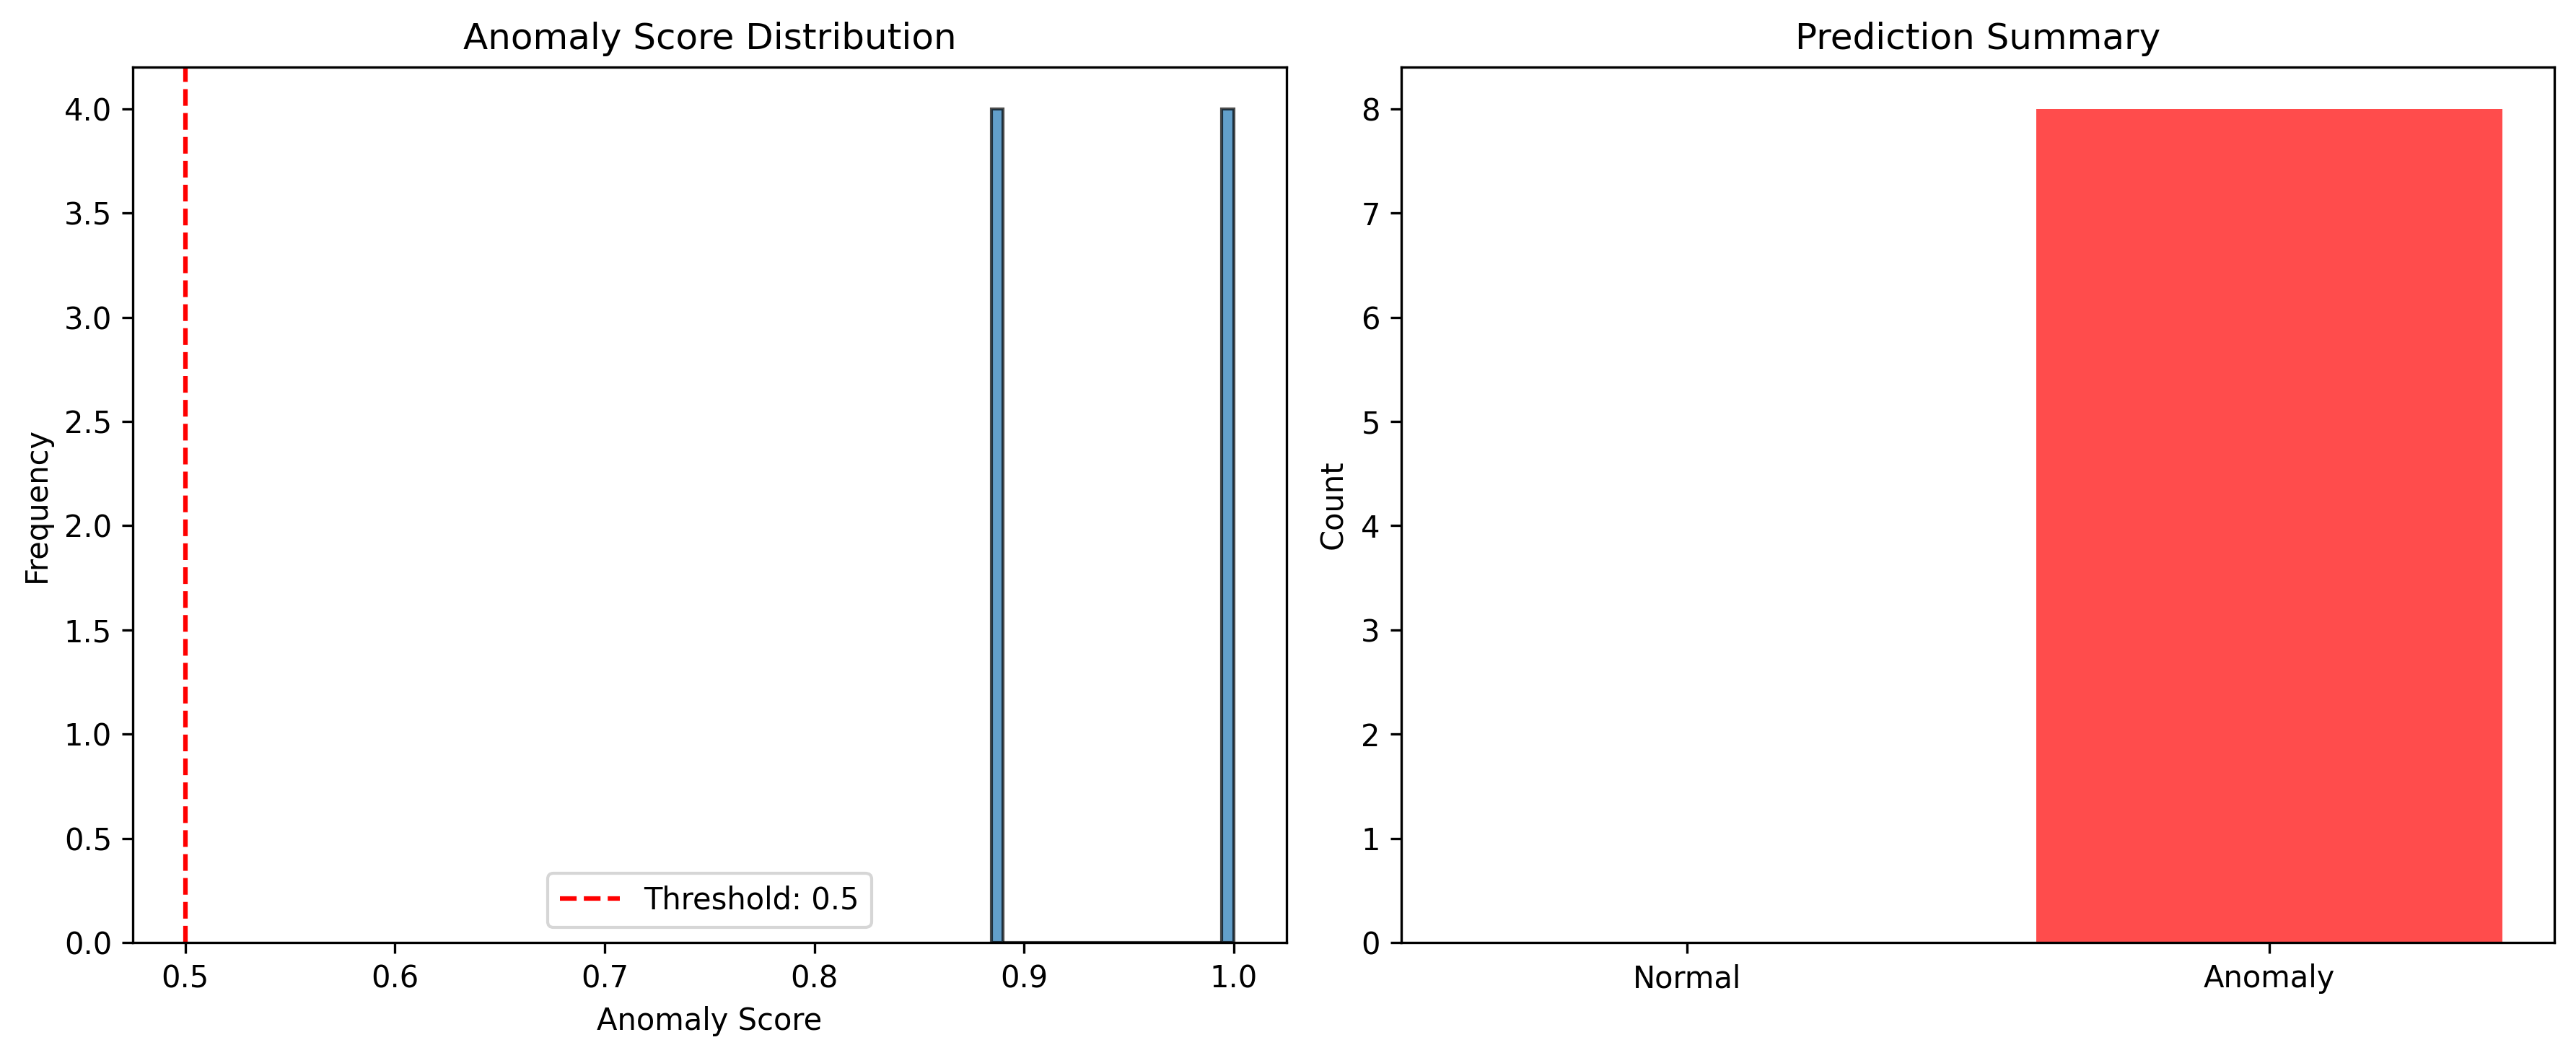


--- Results (first 20 lines) ---
Image Anomaly Detection Results

Image: data\datasets\sample\test\abnormal\abnormal_0.png
Score: 1.0000
Anomaly: True
------------------------------
Image: data\datasets\sample\test\abnormal\abnormal_1.png
Score: 1.0000
Anomaly: True
------------------------------
Image: data\datasets\sample\test\normal\normal_t_0.png
Score: 0.8843
Anomaly: True
------------------------------
Image: data\datasets\sample\test\normal\normal_t_1.png
Score: 0.8843
Anomaly: True
------------------------------
Image: data\datasets\sample\test\abnormal\abnormal_0.png


In [2]:
# Quick smoke test: display prediction summary and sample lines
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
base = Path.cwd().parent  # workspace root (notebooks/..)
summary = base / 'outputs/predictions/custom_test/prediction_summary.png'
results = base / 'outputs/predictions/custom_test/results.txt'
print('Using base:', base)
if summary.exists():
    display(Image.open(summary))
else:
    print('Missing summary image:', summary)
print('\n--- Results (first 20 lines) ---')
if results.exists():
    print('\n'.join(results.read_text(encoding='utf-8', errors='ignore').splitlines()[:20]))
else:
    print('Missing results file:', results)

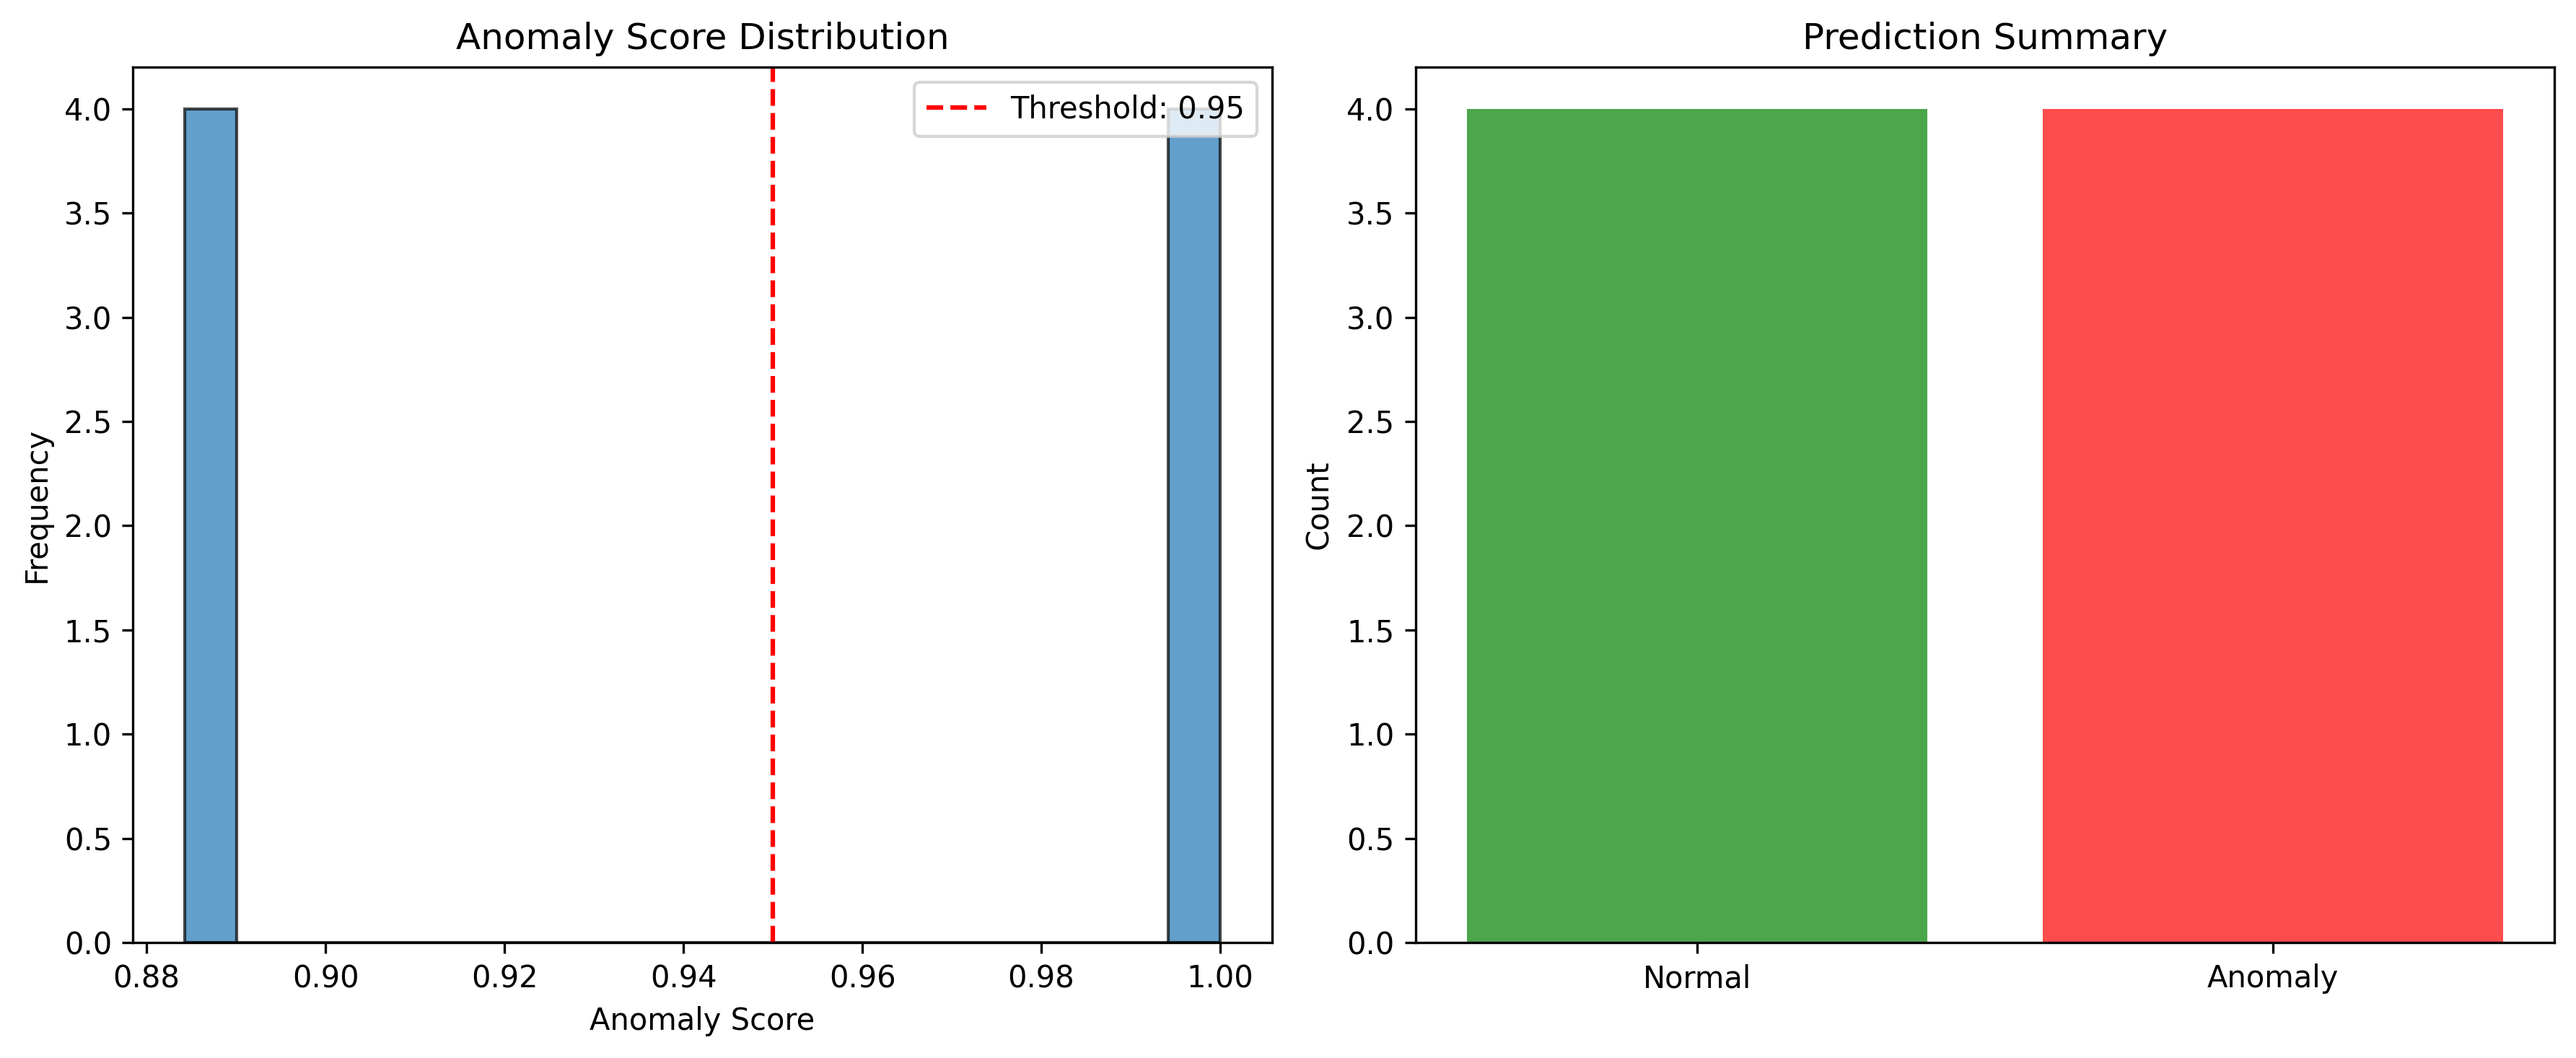


--- Results (first 20 lines, thr=0.95) ---
Image Anomaly Detection Results

Image: data\datasets\sample\test\abnormal\abnormal_0.png
Score: 1.0000
Anomaly(thr=0.95): True
------------------------------
Image: data\datasets\sample\test\abnormal\abnormal_1.png
Score: 1.0000
Anomaly(thr=0.95): True
------------------------------
Image: data\datasets\sample\test\normal\normal_t_0.png
Score: 0.8843
Anomaly(thr=0.95): False
------------------------------
Image: data\datasets\sample\test\normal\normal_t_1.png
Score: 0.8843
Anomaly(thr=0.95): False
------------------------------
Image: data\datasets\sample\test\abnormal\abnormal_0.png


In [4]:
# Display higher-threshold results (0.95)
from pathlib import Path
from PIL import Image
base = Path.cwd().parent
summary2 = base / 'outputs/predictions/custom_thr_095/prediction_summary.png'
results2 = base / 'outputs/predictions/custom_thr_095/results.txt'
display(Image.open(summary2)) if summary2.exists() else print('Missing summary image:', summary2)
print('\n--- Results (first 20 lines, thr=0.95) ---')
print('\n'.join(results2.read_text(encoding='utf-8', errors='ignore').splitlines()[:20])) if results2.exists() else print('Missing results file:', results2)